# Achievement 6 – Exercise 6.2  
## Exploring Relationships in UFC Fight Data (1993–2021)

**Purpose:**  
This notebook conducts an exploratory visual analysis of the cleaned UFC fight dataset.  
The goal is to identify relationships between key performance variables that may inform
later predictive analysis.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("preprocessed_data.csv")

df.head()


,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [3]:
eda_df = df[[
    'B_avg_KD', 'R_avg_KD',
    'B_avg_SIG_STR_pct', 'R_avg_SIG_STR_pct',
    'B_avg_TD_pct', 'R_avg_TD_pct',
    'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
    'Winner'
]]


Only performance-related numeric variables were selected for exploratory analysis.
Identifiers, dates, and text-based columns were excluded as they do not contribute
to relationship analysis.


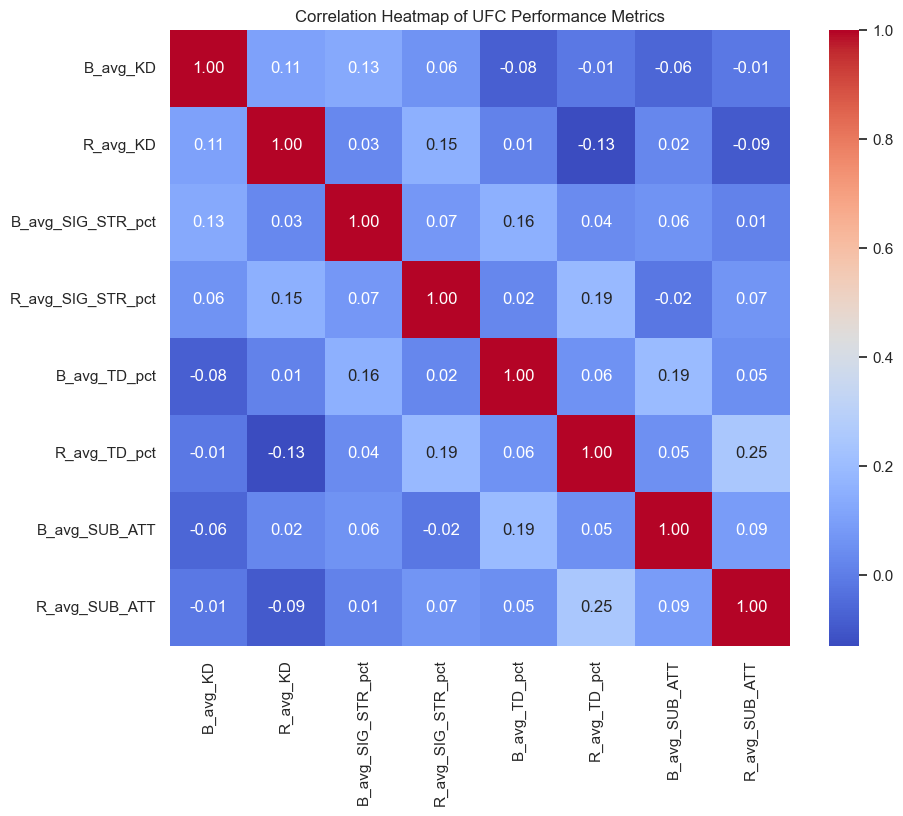

In [4]:
corr = eda_df.drop(columns=['Winner']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of UFC Performance Metrics")
plt.show()


The correlation heatmap shows several moderate relationships between striking,
takedown, and submission metrics. 

For example, striking accuracy metrics for Red and Blue fighters show moderate
positive correlations with knockdowns, suggesting that higher striking efficiency
is associated with offensive success. 

No extremely high correlations were observed, indicating limited multicollinearity
among the selected variables.


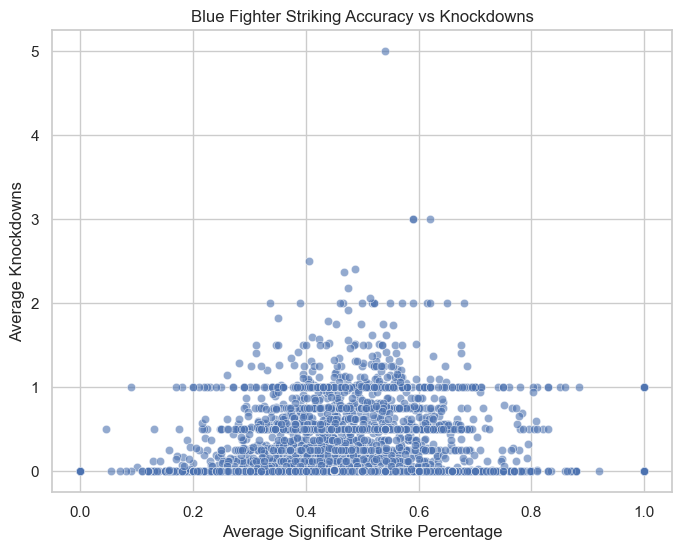

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=eda_df,
    x='B_avg_SIG_STR_pct',
    y='B_avg_KD',
    alpha=0.6
)
plt.title("Blue Fighter Striking Accuracy vs Knockdowns")
plt.xlabel("Average Significant Strike Percentage")
plt.ylabel("Average Knockdowns")
plt.show()


The scatterplot suggests a weak-to-moderate positive relationship between striking
accuracy and knockdowns for Blue fighters. While higher accuracy often corresponds
with more knockdowns, there is considerable variance, indicating other factors
also influence knockdown outcomes.


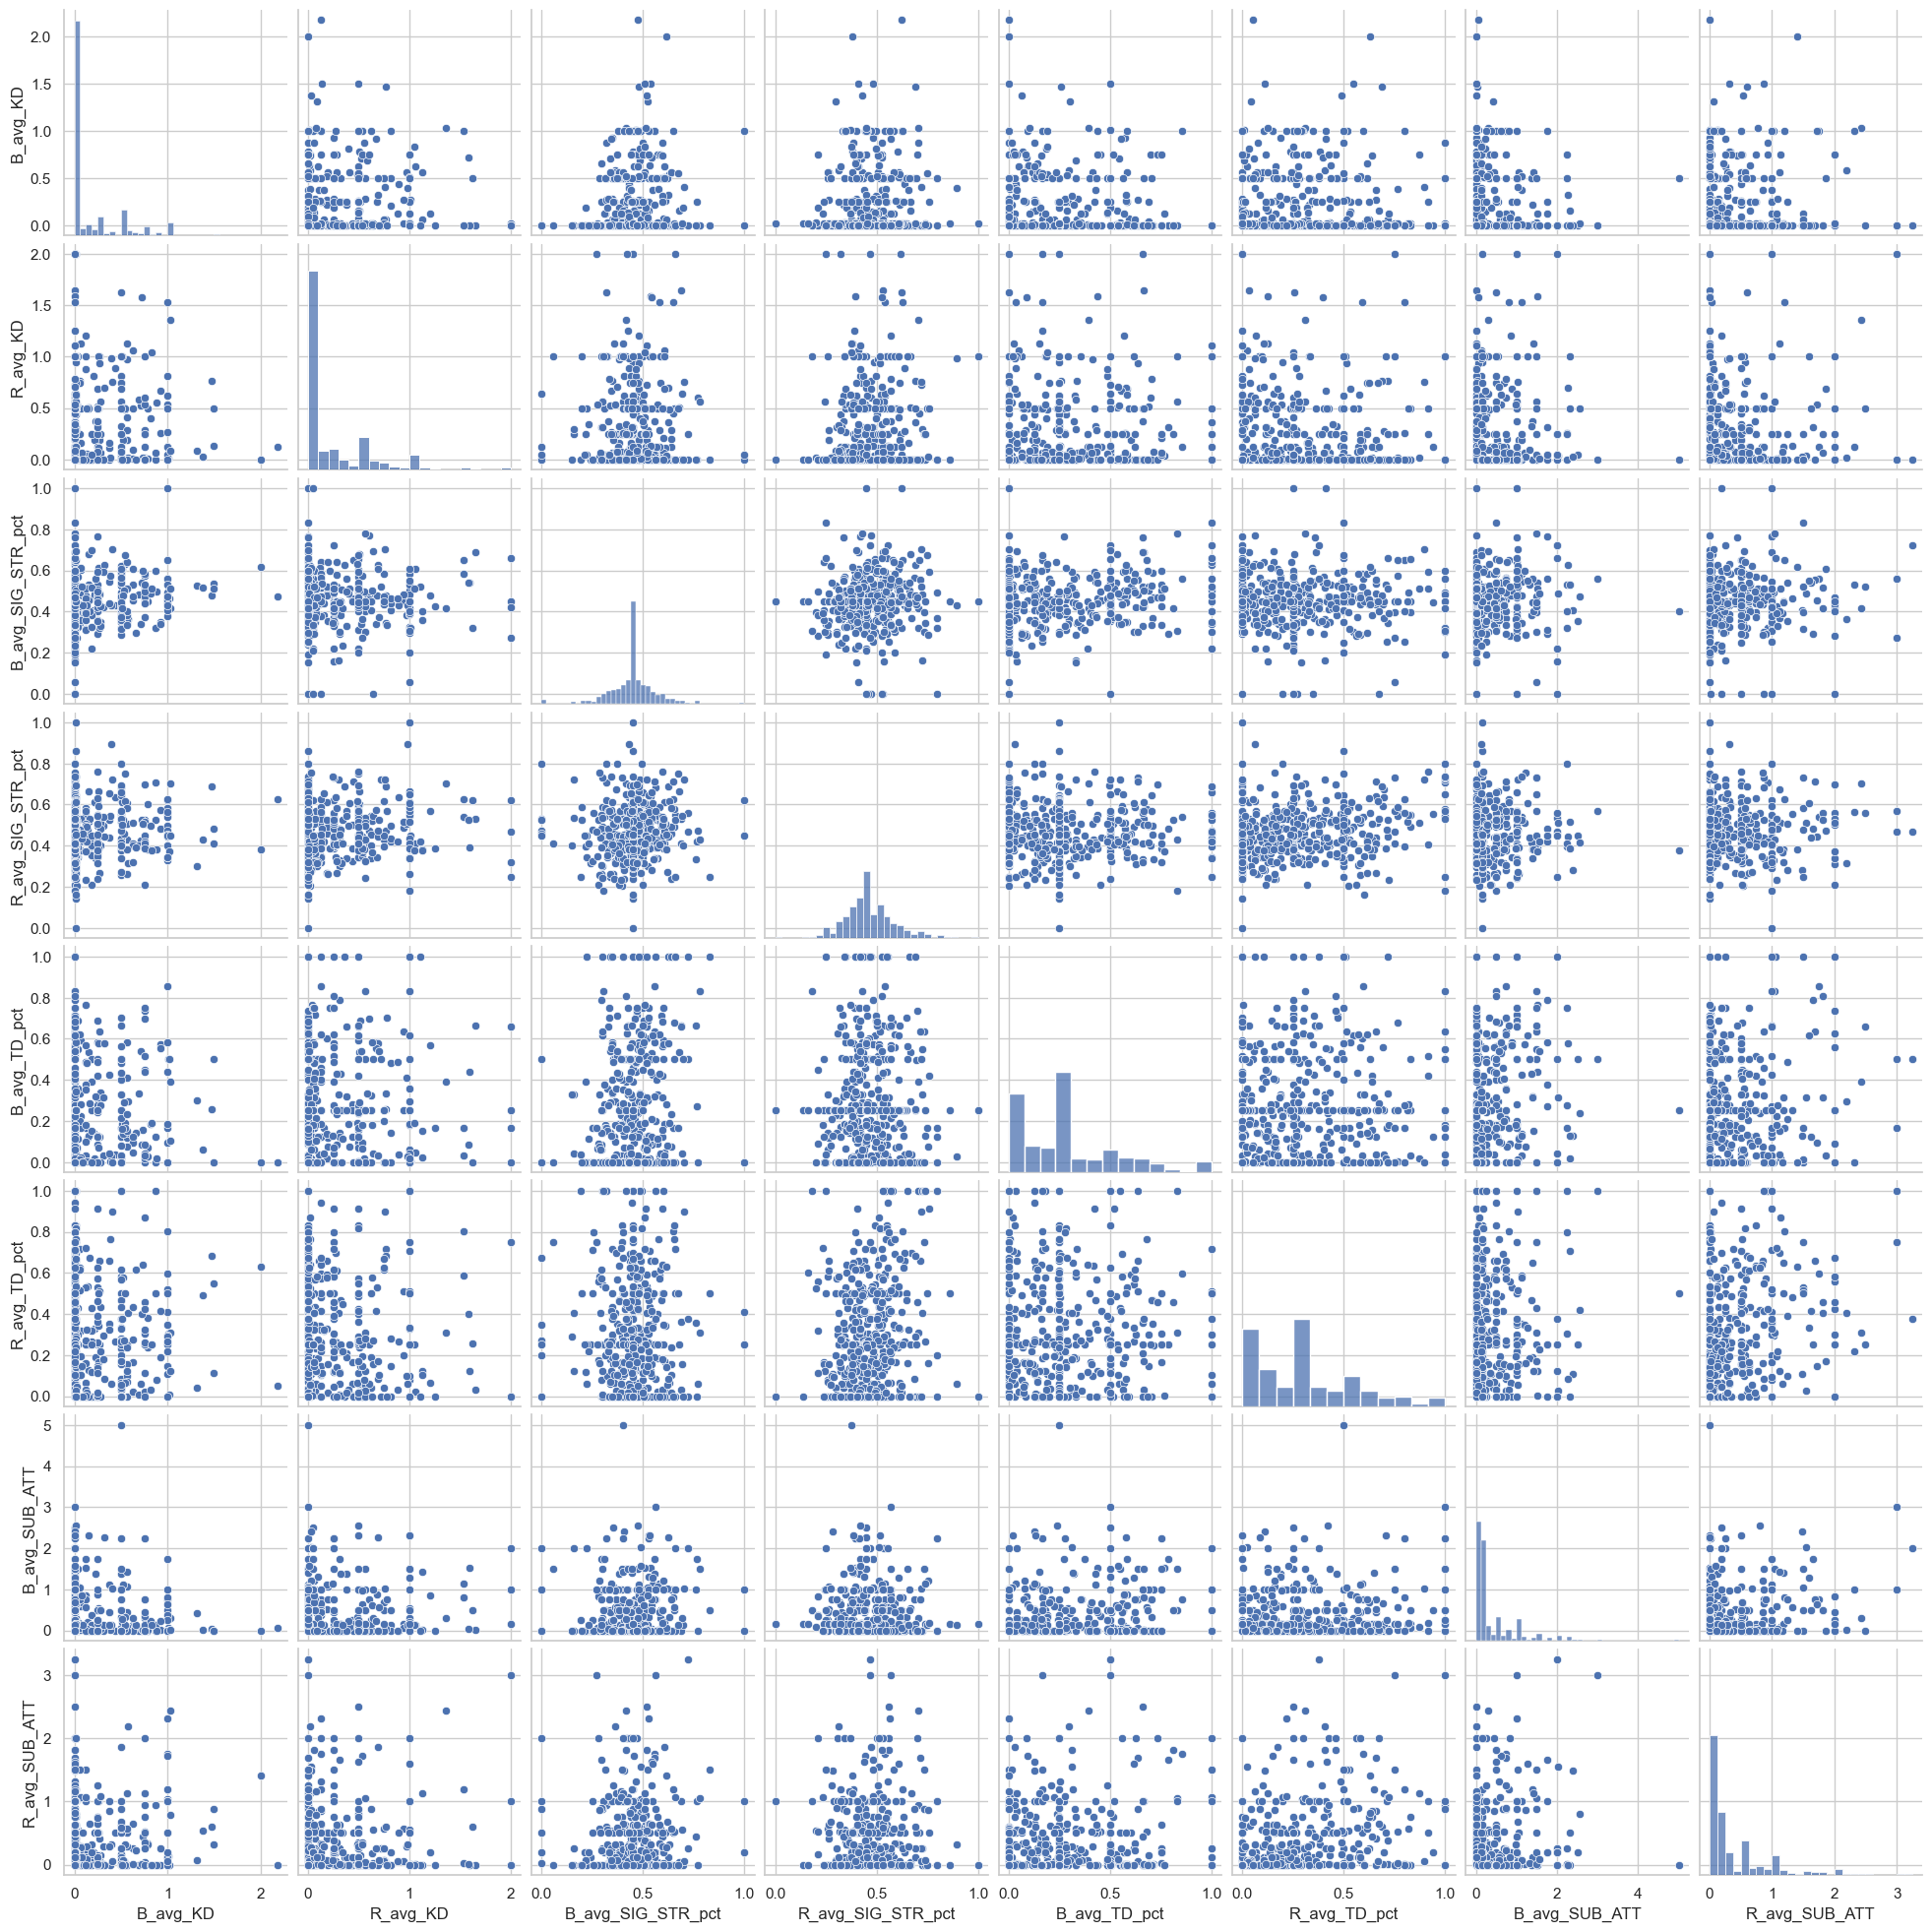

In [7]:
sample_df = eda_df.sample(500, random_state=42)

sns.pairplot(sample_df.drop(columns=['Winner']))
plt.show()


The pair plot reveals generally dispersed relationships among most variables,
indicating that performance metrics interact in complex, non-linear ways.

Some clustering is visible around low knockdown and submission values, suggesting
these outcomes are relatively rare events compared to striking activity.


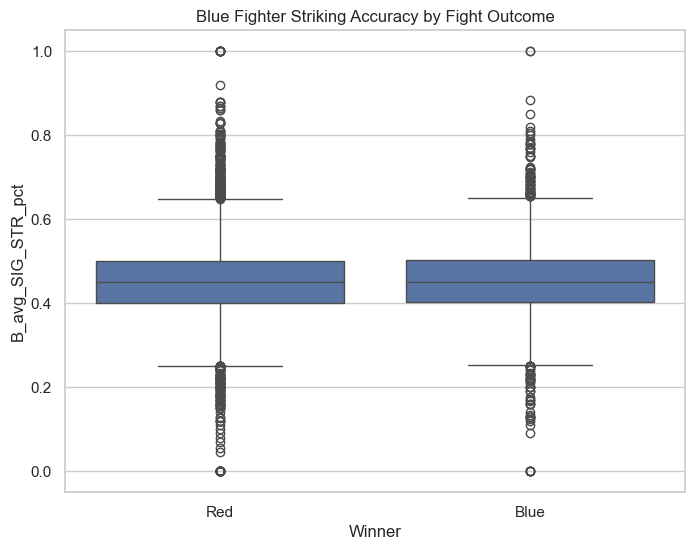

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=eda_df,
    x='Winner',
    y='B_avg_SIG_STR_pct'
)
plt.title("Blue Fighter Striking Accuracy by Fight Outcome")
plt.show()


Blue fighters who won their bouts tend to show slightly higher median striking
accuracy compared to those who lost. However, overlap between groups suggests
striking accuracy alone does not determine fight outcomes.


### Revisited Research Questions
- Does striking accuracy relate to offensive success (knockdowns)?
- Do winners exhibit higher performance metrics than losers?

### New Questions
- How do combinations of striking and grappling metrics influence win probability?
- Are certain metrics more predictive for specific weight classes?

### Hypotheses
- Fighters with higher striking accuracy are more likely to win bouts.
- A combination of striking accuracy and takedown efficiency will better predict
  fight outcomes than either metric alone.
